In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/quora-insincere-questions-classification/sample_submission.csv
/kaggle/input/quora-insincere-questions-classification/embeddings.zip
/kaggle/input/quora-insincere-questions-classification/train.csv
/kaggle/input/quora-insincere-questions-classification/test.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load training data
train_df = pd.read_csv('/kaggle/input/quora-insincere-questions-classification/train.csv')

In [4]:
train_df.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [5]:
train_df.shape

(1306122, 3)

The training data have 1306122 rows and 3 columns total.

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   qid            1306122 non-null  object
 1   question_text  1306122 non-null  object
 2   target         1306122 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 29.9+ MB


The train data have 2 text columns (*qid* and *question_text*) and 1 integer column (*target*):
* The *qid* column contains the id of the questions.
* The *question_text* column contains the content of the questions.
* The *target* column contains the type of the column (0 indicates insincere, 1 indicates sincere)

In [7]:
# Rename the *question_text* column for convenience
train_df = train_df.rename({'question_text': 'question'}, axis=1)

In [8]:
train_df['question'].isnull().sum()

0

There is no null values in the training set.

In [9]:
train_df['question'].isna().sum()

0

The is no na values in the training set.

In [10]:
train_df.target.value_counts()

0    1225312
1      80810
Name: target, dtype: int64

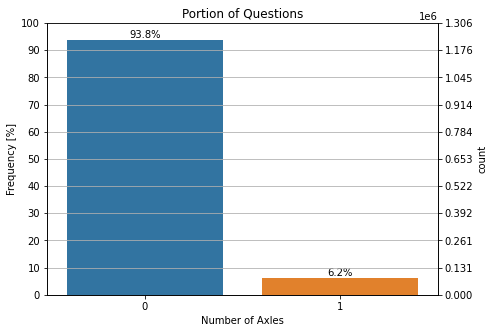

In [11]:
import matplotlib.ticker as ticker

ncount = train_df.shape[0]

plt.figure(figsize=(7, 5))

ax = sns.countplot(data=train_df, x='target')
plt.title('Portion of Questions')
plt.xlabel('Number of Axles')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

We can see that almost of our data is insincere questions (93.8 %), meanwhile, sincere questions just take a small portion (6.2%). Therefore, our data is highly imbalance.

In [12]:
pd.set_option('display.max_columns', None)
insincere_qes = train_df[train_df['target'] == 1]
print(insincere_qes[-5:].question.to_string())

1306093    How is it to have intimate relation with your ...
1306094    Why is it when singers have lyrics about voice...
1306099                    Do pakis smell of curry and shit?
1306103    Isn't Trump right after all? Why should the US...
1306112                  Are you ashamed of being an Indian?


In [13]:
pd.set_option('display.max_columns', None)
sincere_qes = train_df[train_df['target'] == 0]
print(sincere_qes[-5:].question)

1306117    What other technical skills do you need as a c...
1306118    Does MS in ECE have good job prospects in USA ...
1306119                            Is foam insulation toxic?
1306120    How can one start a research project based on ...
1306121    Who wins in a battle between a Wolverine and a...
Name: question, dtype: object


## **Words cloud**

In [14]:
from wordcloud import WordCloud

Word cloud image generated from insincere questions


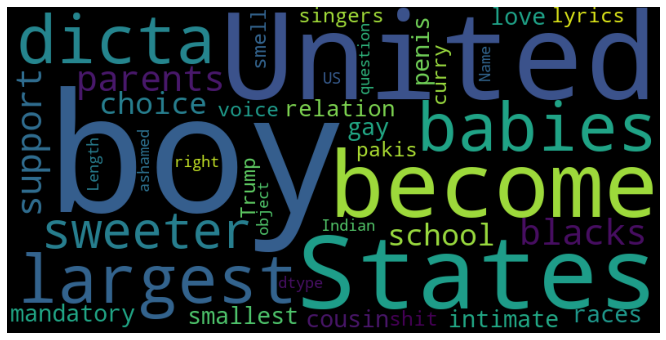

In [15]:
print('Word cloud image generated from insincere questions')
insincere_wordcloud = WordCloud(width=800, height=400, background_color ='black', min_font_size = 10).generate(str(train_df[train_df["target"] == 1]["question"]))
#Positive Word cloud
plt.figure(figsize=(15,6), facecolor=None)
plt.imshow(insincere_wordcloud)
plt.axis("off")
# plt.tight_layout(pad=0)
plt.show();

Word cloud image generated from sincere questions


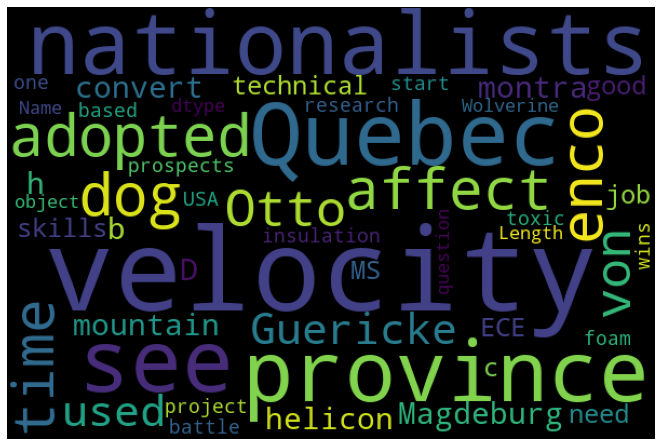

In [16]:
print('Word cloud image generated from sincere questions')
sincere_wordcloud = WordCloud(width=600, height=400, background_color ='black', min_font_size = 10).generate(str(train_df[train_df["target"] == 0]["question"]))
#Positive Word cloud
plt.figure(figsize=(15,6), facecolor=None)
plt.imshow(sincere_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show();

## **Text statistics** 

In [17]:
train_df.head()

,qid,question,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [18]:
import string
from nltk.corpus import stopwords

# Set up contraction dictionary
contraction_dict = {"dont": "do not", "aint": "is not", "isnt": "is not", "doesnt": "does not", "cant": "cannot", "mustnt": "must not", "hasnt": "has not", "havent": "have not", "arent": "are not", "ain't": "is not", "aren't": "are not","can't": "cannot", "‘cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "Iam": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will", "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

# Set up stop words list
stop_words = stopwords.words('english')
stop_words.remove('not')

# Set up puntuation list
punctuation = string.punctuation 

### **Feature engineering**

In [19]:
#Feature Engineering on train_df data

def create_features(df):
    """Retrieve from the text column the number of: characters, words, unique words, stopwords,
    punctuations, upper/lower case chars"""
    df["lenght"] = df["question"].apply(lambda x: len(str(x)))
    df["no_words"] = df["question"].apply(lambda x: len(x.split()))
    df["no_unique_words"] = df["question"].apply(lambda x: len(set(str(x).split())))
    df["no_stopwords"] = df["question"].apply(lambda x : len([nw for nw in str(x).split() if nw.lower() in stop_words]))
    df["no_punctuation"] = df["question"].apply(lambda x : len([np for np in str(x) if np in punctuation]))
    df["no_uppercase"] = df["question"].apply(lambda x : len([nu for nu in str(x).split() if nu.isupper()]))
    df["no_lowercase"] = df["question"].apply(lambda x : len([nl for nl in str(x).split() if nl.islower()]))
    return df

In [20]:
train_df = create_features(train_df)

The statistics of insincere questions

In [21]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
train_df[train_df['target'] == 0].describe()

,target,lenght,no_words,no_unique_words,no_stopwords,no_punctuation,no_uppercase,no_lowercase
count,1225312.000,1225312.000,1225312.000,1225312.000,1225312.000,1225312.000,1225312.000,1225312.000
mean,0.000,68.873,12.509,11.878,6.011,1.705,0.459,10.030
std,0.000,36.740,6.751,5.783,3.583,1.548,0.845,6.169
min,0.000,5.000,2.000,2.000,0.000,0.000,0.000,0.000
25%,0.000,44.000,8.000,8.000,4.000,1.000,0.000,6.000
50%,0.000,59.000,11.000,10.000,5.000,1.000,0.000,8.000
75%,0.000,83.000,15.000,14.000,7.000,2.000,1.000,12.000
max,0.000,752.000,134.000,96.000,56.000,158.000,25.000,112.000


The statistics of sincere questions

In [22]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
train_df[train_df['target'] == 1].describe()

,target,lenght,no_words,no_unique_words,no_stopwords,no_punctuation,no_uppercase,no_lowercase
count,80810.000,80810.000,80810.000,80810.000,80810.000,80810.000,80810.000,80810.000
mean,1.000,98.064,17.278,16.038,7.921,2.370,0.326,13.919
std,0.000,55.186,9.568,8.154,4.857,2.906,0.897,8.661
min,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000
25%,1.000,55.000,10.000,10.000,4.000,1.000,0.000,7.000
50%,1.000,86.000,15.000,14.000,7.000,2.000,0.000,12.000
75%,1.000,130.000,23.000,21.000,11.000,3.000,0.000,19.000
max,1.000,1017.000,64.000,48.000,37.000,411.000,37.000,56.000


<Figure size 1080x1080 with 0 Axes>

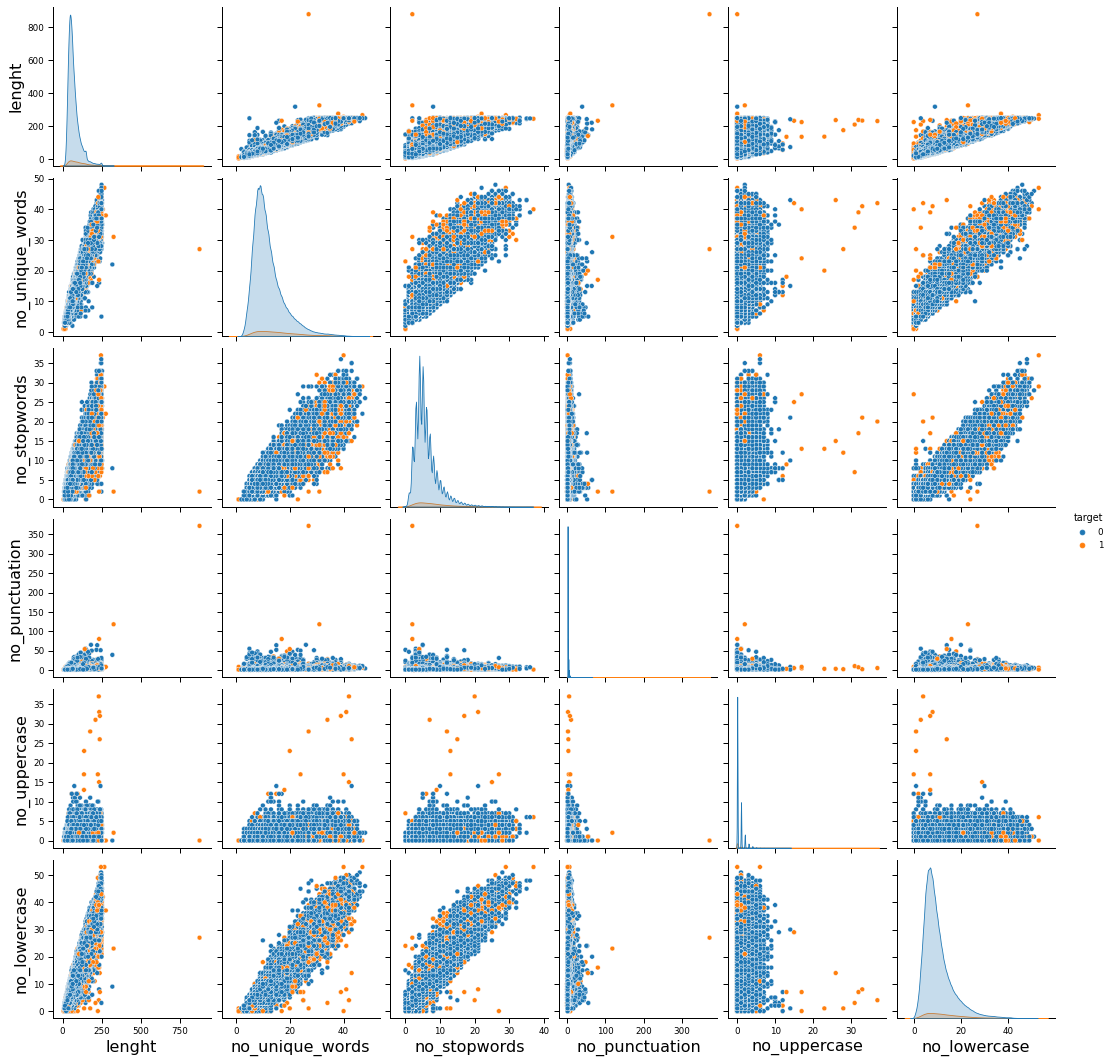

In [23]:
num_feat = ['lenght', 'no_unique_words', 'no_stopwords', 
            'no_punctuation', 'no_uppercase', 'no_lowercase', 'target'] 
# side note : remove target if needed later

dfsample = train_df[num_feat].sample(n=round(train_df.shape[0]/6), random_state=42)

plt.figure(figsize=(15,15))
sns.set_context("paper", rc={"axes.labelsize":16})
sns.pairplot(data=dfsample, hue='target')
plt.show()

#### The distribution of the questions's number of lowercases.

Text(0.5, 1.0, "Distribution of the question's number of lowercases")

<Figure size 720x720 with 0 Axes>

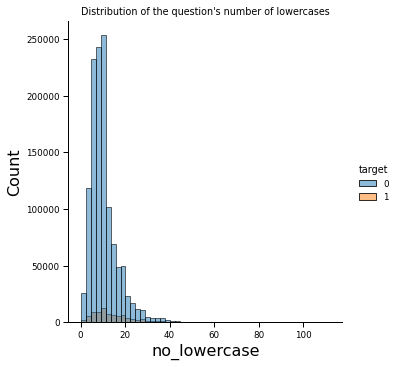

In [24]:
plt.figure(figsize=(10, 10))
sns.displot(train_df, x='no_lowercase', hue='target', kind='hist', bins=50)
plt.title("Distribution of the question's number of lowercases")

In general, both type have the same distribution.

In general, insincere questions tend to be much shorter than sincere questions.
The longer the question is, the more uppercased characters 

In [25]:
target_correlation = train_df.corr()['target'][1:]

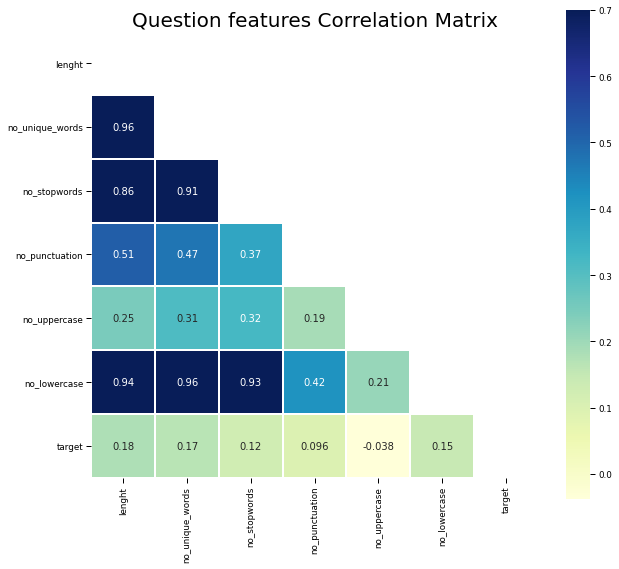

In [26]:
mask = np.zeros_like(train_df[num_feat].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(10, 10))
plt.title('Question features Correlation Matrix',fontsize=20)

sns.heatmap(train_df[num_feat].corr(),square=True, linewidths=0.25,vmax=0.7,cmap="YlGnBu",
            linecolor='w',annot=True,annot_kws={"size":10},mask=mask,cbar_kws={"shrink": .9});

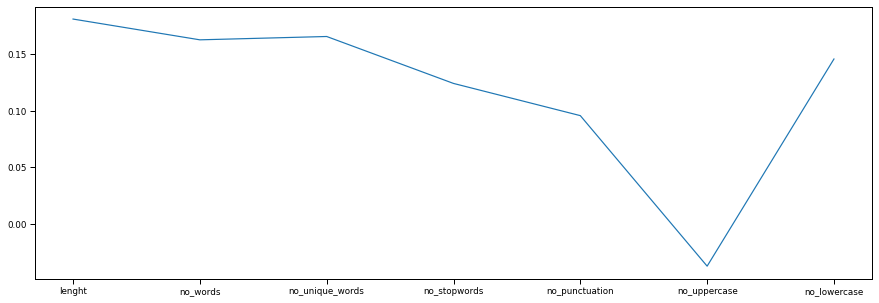

In [27]:
plt.figure(figsize=(15, 5))

target_correlation = train_df.corr()['target'][1:]
plt.plot(target_correlation)

The length of the question differentiates its type best, but the coefficient is not too much (only 0.18).

In conclusion, all the features correlates with the target, but not in a sufficient ratio.


## **Data Preprocessing**

In [28]:
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer

lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer('english')

In [29]:
def qes_preprocessing(qes):
    # Data cleaning:
    qes = re.sub(re.compile('<.*?>'), '', qes)
    qes = re.sub('[^A-Za-z0-9]+', ' ', qes)

    # Lowercase:
    qes = qes.lower()

    # Tokenization:
    tokens = word_tokenize(qes)

    # Contractions replacement:
    tokens = [contraction_dict.get(token) if (contraction_dict.get(token) != None) else token for token in tokens]

    # Stop words removal:
    tokens = [w for w in tokens if w not in stop_words]

    # Stemming:
    tokens = [stemmer.stem(token) for token in tokens]
    
    # Lemmatization:
    tokens = [lemmatizer.lemmatize(w) for w in tokens]

    # Join words after preprocessed:
    qes = ' '.join(tokens) 

    return qes

In [30]:
train_df['preprocessed_questions'] = train_df['question'].apply(qes_preprocessing)

## **Train model**

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import f1_score, confusion_matrix, classification_report

X = train_df['preprocessed_questions']
y = train_df.target

### Model 1: MultinomialNB

In [32]:
# BOW
nb_bow_pipeline = Pipeline([("cv", CountVectorizer(analyzer="word", ngram_range=(2,4), max_df=0.85)),
                     ("model", MultinomialNB())])

# TF-IDF
nb_tdf_pipelione = Pipeline([("tfid", TfidfVectorizer(lowercase=False, min_df=0.01, max_df=0.95)),
                     ("model", MultinomialNB())])

### Model 2: Logistic Regression

In [33]:
# BOW
lr_bow_pipeline = Pipeline([("cv", CountVectorizer(analyzer="word", ngram_range=(1,4), max_df=0.9)),
                     ("model", LogisticRegression(solver="saga", class_weight="balanced", C=0.45, max_iter=250, verbose=1, n_jobs=-1))
                           ])

# TF-IDF
lr_tdf_pipeline = Pipeline([("tfid", TfidfVectorizer(lowercase=False, min_df=0.01, max_df=0.95)),
                     ("model", LogisticRegression(solver="saga", class_weight="balanced", C=0.45, max_iter=250, verbose=1, n_jobs=-1))
                           ])

In [34]:
models = [nb_bow_pipeline, nb_tdf_pipelione, lr_bow_pipeline, lr_tdf_pipeline]

In [35]:
kfold = KFold(n_splits=5, shuffle=True)

fold = 1

for train_index, test_index in kfold.split(X, y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index] 
    print(f'Fold {fold}:')
    for model_pipeline in models:
        print(model_pipeline)
        model_pipeline.fit(X_train, y_train)
        predictions = model_pipeline.predict(X_test)

        print(classification_report(y_test, predictions), '\n') 
        
        print(f'F1-score = {f1_score(y_test, predictions):.2f}')

    fold += 1

Fold 1:
Pipeline(steps=[('cv', CountVectorizer(max_df=0.85, ngram_range=(2, 4))),
                ('model', MultinomialNB())])
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    245370
           1       0.68      0.22      0.33     15855

    accuracy                           0.95    261225
   macro avg       0.82      0.60      0.65    261225
weighted avg       0.94      0.95      0.93    261225
 

F1-score = 0.33
Pipeline(steps=[('tfid',
                 TfidfVectorizer(lowercase=False, max_df=0.95, min_df=0.01)),
                ('model', MultinomialNB())])
              precision    recall  f1-score   support

           0       0.94      1.00      0.97    245370
           1       0.73      0.00      0.00     15855

    accuracy                           0.94    261225
   macro avg       0.83      0.50      0.49    261225
weighted avg       0.93      0.94      0.91    261225
 

F1-score = 0.00
Pipeline(steps=[('cv', CountVectori

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 531 seconds


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  8.9min finished


              precision    recall  f1-score   support

           0       0.98      0.96      0.97    245370
           1       0.53      0.70      0.60     15855

    accuracy                           0.94    261225
   macro avg       0.76      0.83      0.79    261225
weighted avg       0.95      0.94      0.95    261225
 

F1-score = 0.60
Pipeline(steps=[('tfid',
                 TfidfVectorizer(lowercase=False, max_df=0.95, min_df=0.01)),
                ('model',
                 LogisticRegression(C=0.45, class_weight='balanced',
                                    max_iter=250, n_jobs=-1, solver='saga',
                                    verbose=1))])


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 100 seconds


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.7min finished


              precision    recall  f1-score   support

           0       0.96      0.87      0.91    245370
           1       0.19      0.47      0.27     15855

    accuracy                           0.85    261225
   macro avg       0.58      0.67      0.59    261225
weighted avg       0.92      0.85      0.88    261225
 

F1-score = 0.27
Fold 2:
Pipeline(steps=[('cv', CountVectorizer(max_df=0.85, ngram_range=(2, 4))),
                ('model', MultinomialNB())])
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    244926
           1       0.68      0.21      0.32     16299

    accuracy                           0.94    261225
   macro avg       0.82      0.60      0.65    261225
weighted avg       0.93      0.94      0.93    261225
 

F1-score = 0.32
Pipeline(steps=[('tfid',
                 TfidfVectorizer(lowercase=False, max_df=0.95, min_df=0.01)),
                ('model', MultinomialNB())])
              precision    recall  

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 585 seconds


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  9.8min finished


              precision    recall  f1-score   support

           0       0.98      0.96      0.97    244926
           1       0.54      0.69      0.61     16299

    accuracy                           0.94    261225
   macro avg       0.76      0.83      0.79    261225
weighted avg       0.95      0.94      0.95    261225
 

F1-score = 0.61
Pipeline(steps=[('tfid',
                 TfidfVectorizer(lowercase=False, max_df=0.95, min_df=0.01)),
                ('model',
                 LogisticRegression(C=0.45, class_weight='balanced',
                                    max_iter=250, n_jobs=-1, solver='saga',
                                    verbose=1))])


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 103 seconds


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.7min finished


              precision    recall  f1-score   support

           0       0.96      0.90      0.93    244926
           1       0.23      0.43      0.30     16299

    accuracy                           0.87    261225
   macro avg       0.59      0.67      0.61    261225
weighted avg       0.91      0.87      0.89    261225
 

F1-score = 0.30
Fold 3:
Pipeline(steps=[('cv', CountVectorizer(max_df=0.85, ngram_range=(2, 4))),
                ('model', MultinomialNB())])
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    245058
           1       0.68      0.21      0.32     16166

    accuracy                           0.94    261224
   macro avg       0.81      0.60      0.65    261224
weighted avg       0.93      0.94      0.93    261224
 

F1-score = 0.32
Pipeline(steps=[('tfid',
                 TfidfVectorizer(lowercase=False, max_df=0.95, min_df=0.01)),
                ('model', MultinomialNB())])
              precision    recall  

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 598 seconds


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed: 10.0min finished


              precision    recall  f1-score   support

           0       0.98      0.96      0.97    245058
           1       0.53      0.70      0.60     16166

    accuracy                           0.94    261224
   macro avg       0.76      0.83      0.79    261224
weighted avg       0.95      0.94      0.95    261224
 

F1-score = 0.60
Pipeline(steps=[('tfid',
                 TfidfVectorizer(lowercase=False, max_df=0.95, min_df=0.01)),
                ('model',
                 LogisticRegression(C=0.45, class_weight='balanced',
                                    max_iter=250, n_jobs=-1, solver='saga',
                                    verbose=1))])


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 115 seconds


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.9min finished


              precision    recall  f1-score   support

           0       0.96      0.80      0.88    245058
           1       0.16      0.56      0.25     16166

    accuracy                           0.79    261224
   macro avg       0.56      0.68      0.56    261224
weighted avg       0.91      0.79      0.84    261224
 

F1-score = 0.25
Fold 4:
Pipeline(steps=[('cv', CountVectorizer(max_df=0.85, ngram_range=(2, 4))),
                ('model', MultinomialNB())])
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    244927
           1       0.68      0.21      0.33     16297

    accuracy                           0.94    261224
   macro avg       0.82      0.60      0.65    261224
weighted avg       0.93      0.94      0.93    261224
 

F1-score = 0.33
Pipeline(steps=[('tfid',
                 TfidfVectorizer(lowercase=False, max_df=0.95, min_df=0.01)),
                ('model', MultinomialNB())])
              precision    recall  

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 620 seconds


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed: 10.4min finished


              precision    recall  f1-score   support

           0       0.98      0.96      0.97    244927
           1       0.54      0.70      0.61     16297

    accuracy                           0.94    261224
   macro avg       0.76      0.83      0.79    261224
weighted avg       0.95      0.94      0.95    261224
 

F1-score = 0.61
Pipeline(steps=[('tfid',
                 TfidfVectorizer(lowercase=False, max_df=0.95, min_df=0.01)),
                ('model',
                 LogisticRegression(C=0.45, class_weight='balanced',
                                    max_iter=250, n_jobs=-1, solver='saga',
                                    verbose=1))])


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 123 seconds


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.0min finished


              precision    recall  f1-score   support

           0       0.96      0.79      0.87    244927
           1       0.15      0.57      0.24     16297

    accuracy                           0.78    261224
   macro avg       0.56      0.68      0.55    261224
weighted avg       0.91      0.78      0.83    261224
 

F1-score = 0.24
Fold 5:
Pipeline(steps=[('cv', CountVectorizer(max_df=0.85, ngram_range=(2, 4))),
                ('model', MultinomialNB())])
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    245031
           1       0.69      0.22      0.33     16193

    accuracy                           0.95    261224
   macro avg       0.82      0.60      0.65    261224
weighted avg       0.93      0.95      0.93    261224
 

F1-score = 0.33
Pipeline(steps=[('tfid',
                 TfidfVectorizer(lowercase=False, max_df=0.95, min_df=0.01)),
                ('model', MultinomialNB())])
              precision    recall  

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 619 seconds


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed: 10.3min finished


              precision    recall  f1-score   support

           0       0.98      0.96      0.97    245031
           1       0.54      0.69      0.61     16193

    accuracy                           0.94    261224
   macro avg       0.76      0.83      0.79    261224
weighted avg       0.95      0.94      0.95    261224
 

F1-score = 0.61
Pipeline(steps=[('tfid',
                 TfidfVectorizer(lowercase=False, max_df=0.95, min_df=0.01)),
                ('model',
                 LogisticRegression(C=0.45, class_weight='balanced',
                                    max_iter=250, n_jobs=-1, solver='saga',
                                    verbose=1))])


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 120 seconds


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.0min finished


              precision    recall  f1-score   support

           0       0.97      0.76      0.85    245031
           1       0.14      0.60      0.23     16193

    accuracy                           0.75    261224
   macro avg       0.55      0.68      0.54    261224
weighted avg       0.92      0.75      0.81    261224
 

F1-score = 0.23


## **2. Load test.csv, make predictions and output submission**

### 2.1 Load dataset

In [36]:
test_df = pd.read_csv('/kaggle/input/quora-insincere-questions-classification/test.csv')

In [37]:
test_df.head()

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


In [38]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375806 entries, 0 to 375805
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   qid            375806 non-null  object
 1   question_text  375806 non-null  object
dtypes: object(2)
memory usage: 5.7+ MB


In [39]:
test_df.shape

(375806, 2)

### 2.2 Preprocessing data

In [40]:
test_df['preprocessed'] = test_df['question_text'].apply(qes_preprocessing)

### 2.3 Make predictions

In [41]:
predictions = models[2].predict(test_df['preprocessed'])

In [42]:
print(len(predictions))
print(predictions[-10:])
print(test_df['question_text'][-10:])

375806
[0 0 0 1 0 0 0 0 0 0]
375796    Why should one prefer MI band over a normal wa...
375797    Do you think our system is fair? Consider fact...
375798    Is it really difficult to get accepted to Ivy ...
375799    Why do all the stupid people I know tend to be...
375800    How can I prepare for JEE Mains 2018 if I star...
375801    How many countries listed in gold import in in...
375802    Is there an alternative to dresses on formal p...
375803    Where I can find best friendship quotes in Tel...
375804          What are the causes of refraction of light?
375805    Climate change is a worrying topic. How much t...
Name: question_text, dtype: object


### 2.4 Make submission

In [43]:
test_df['prediction'] = predictions
results = test_df[['qid', 'prediction']]
results.to_csv('submission.csv', index=False)
results.shape

(375806, 2)